<a href="https://colab.research.google.com/github/aerimili/EIE401-1-Multimedia/blob/main/Proyectos/Proyecto_2/Proyecto_2_VillalobosAlejandra_20914803_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 2</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Alejandra Villalobos</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [ ]:
from IPython.display import IFrame, display
#filepath = "Proyecto_2_EIE401.pdf"
#IFrame(filepath, width=700, height=400)

En la dirección https://huggingface.co/datasets/astroboy1/metasurfaces_V1_30-90GHZ encontrarás el archivo batch_june2024.zip que contiene las imagenes que usarás para el procesamiento. ATENCION: usa el archivo zip indicado pues tienes las imagenes preparadas para tu trabajo.

## 1. Carga de Datos


- En los archivos, encontrarás un folder con imagenes de 3 categorías: cross, box, circle.
Cada imagen tiene una medida de 512x512 pixeles y 3 canales. Se han acentuado los azules y rojos para facilitar el proceso de obtención de características.

- Puedes extraer la clase a la que pertenece la imagen, desde el nombre del archivo. Ahí mismo encuentras números de serie que te permiten identificar de forma específica una imagen.

- Se te entrega 3 imagenes de referencia de 32x32 pixeles, las que debes usar como plantilla para el proceso de clasificación de la imagen.


In [1]:
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
import cv2
from multiprocessing import Pool
from google.colab import files
from timeit import default_timer as timer
from skimage.feature import match_template

In [ ]:
#Subir archivo "batch_june2024.zip"
print("Suba archivo batch_june2024.zip: ")
uploaded = files.upload()

In [3]:
def descomprimirArchivo(archivoZip, carpetaDestino):
  """
  Descomprime archivo Zip en carpeta dada.

  Parámetros:
  archivoZip: Ruta del archivo Zip a descomprimir.
  carpetaDestino: Carpeta donde se guarda el archivo descomprimido
  """
  #Abrir archivo Zip en modo lectura
  with zipfile.ZipFile(archivoZip, 'r') as zipRef:
     zipRef.extractall(carpetaDestino)

rutaZip = "batch_june2024.zip" #Ruta de archivo Zip

destino = os.path.join(os.path.dirname(rutaZip), "descomprimido") #Ruta de carpeta donde se descomprimirá archivo Zip

os.makedirs(destino, exist_ok=True) #Crear carpeta si no existe

descomprimirArchivo(rutaZip, destino) #Descomprimir archivo Zip en carpeta de destino

In [4]:
def redimensionarImagenes(carpetaOrigen, carpetaDestino, nombreImagen):
  """
  Redimensiona una imagen a 128x128 pixeles.

  Parámetros:
  carpetaOrigen: Carpeta donde se encuentra la imagen a redimensionar
  carpetaDestino: Carpeta donde se guarda la imagen redimensionada
  nombreImgen: Nombre del archivo de la imagen a redimensionar
  """

  rutaOrigen = os.path.join(carpetaOrigen, nombreImagen) #Definir la ruta de cada imagen en la carpeta de origen
  rutaDestino = os.path.join(carpetaDestino, nombreImagen) #Definir la ruta de cada imagen en la carpeta de destino

  imagen = cv2.imread(rutaOrigen) #Leer imágenes
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Convertir imágenes a escala de grises
  imagen = cv2.resize(imagen, (128,128)) #Redimensionar imágenes a 128x128 pixeles
  cv2.imwrite(rutaDestino, imagen) #Guardar imágenes en carpeta de destino

def main():
  carpetasOrigen = ["descomprimido/processed512"] #Carpeta donde se encuentran las imágenes a redimensionar
  carpetasDestino = ["imagenes128x128"] #Carpeta donde se guardarán imágenes redimensionadas

  os.makedirs(carpetasDestino[0], exist_ok=True) #Crear carpeta de destino si no existe

  tareas = []
  for origen in carpetasOrigen:
   for nombreImagen in os.listdir(origen):
      if nombreImagen.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
         tareas.append((origen, carpetasDestino[0], nombreImagen)) #Agregar tarea a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    pool.starmap(redimensionarImagenes, tareas)

if __name__ == '__main__':
  main()

(-0.5, 127.5, 127.5, -0.5)

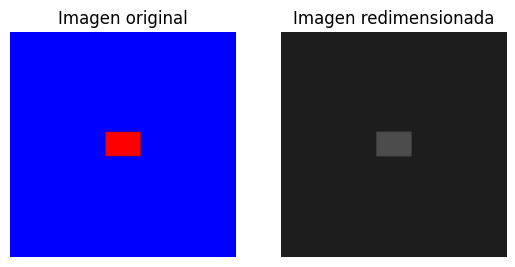

In [5]:
#Graficar ejemplo de imagen original y redimensionada en escala de grises
rutaoriginal = "descomprimido/processed512/box_01_freq_reflect_09a2f2c2-ad7f-11ee-bb2a-047c16a08772_0-0_80-90.png"
imagenoriginal = cv2.imread(rutaoriginal)
rutaredimensionada = "imagenes128x128/box_01_freq_reflect_09a2f2c2-ad7f-11ee-bb2a-047c16a08772_0-0_80-90.png"
imagenredimensionada = cv2.imread(rutaredimensionada)
plt.subplot(121)
plt.imshow(imagenoriginal[:,:,[2,1,0]])
plt.title("Imagen original")
plt.axis("off")
plt.subplot(122)
plt.imshow(imagenredimensionada[:,:,[2,1,0]], cmap = "gray")
plt.title("Imagen redimensionada")
plt.axis("off")

In [ ]:
#Subir archivo "box_templae.png"
print("Suba archivo box_templae.png: ")
uploaded = files.upload()

In [7]:
rutaTemplatebox = "box_templae.png" #Ruta de plantilla "box"
templateBox = cv2.imread(rutaTemplatebox) #Leer plantilla
templateBox = cv2.cvtColor(templateBox, cv2.COLOR_BGR2GRAY) #Convertir plantilla a escala de grises

In [ ]:
#Subir archivo "cross_templae.png"
print("Suba archivo cross_templae.png: ")
uploaded = files.upload()

In [9]:
rutaTemplateCross = "cross_templae.png" #Ruta de plantilla "cross"
templateCross = cv2.imread(rutaTemplateCross) #Leer plantilla
templateCross = cv2.cvtColor(templateCross, cv2.COLOR_BGR2GRAY) #Convertir plantilla a escala de grises

In [ ]:
#Subir archivo "circ_templae.png"
print("Suba archivo circ_templae.png: ")
uploaded = files.upload()

In [11]:
rutaTemplateCirc = "circ_templae.png" #Ruta de plantilla "circ"
templateCirc = cv2.imread(rutaTemplateCirc) #Leer plantilla
templateCirc = cv2.cvtColor(templateCirc, cv2.COLOR_BGR2GRAY) #Convertir plantilla a escala de grises

(-0.5, 15.5, 15.5, -0.5)

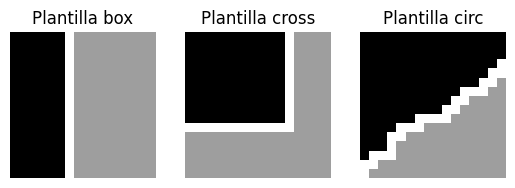

In [12]:
#Graficar plantillas en escala de grises
plt.subplot(131)
plt.imshow(templateBox, cmap="gray")
plt.title("Plantilla box")
plt.axis("off")
plt.subplot(132)
plt.imshow(templateCross, cmap="gray")
plt.title("Plantilla cross")
plt.axis("off")
plt.subplot(133)
plt.imshow(templateCirc, cmap="gray")
plt.title("Plantilla circ")
plt.axis("off")

## 2. Transformar imagen
Recuerda que la tarea es lograr el procesamiento más rápido posible.
Para lograr esto, realiza las operaciones que consideres necesarias sobre la imagen original para el posterior trabajo de Matching con las plantillas dadas. Crees que trabajar en el dominio de fourier o wavelet ayudaría en las etapas posteriores?

In [13]:
def waveletImagen(carpetasOrigen, carpetasDestino, nombreImagen):
  """
  Transformada wavelet a imágenes

  Parámetros:
  carpetaOrigen: Carpeta donde se encuentra la imagen a transformar
  carpetaDestino: Carpeta donde se guarda la imagen a transformar
  nombreImgen: Nombre del archivo de la imagen a transformar
  """
  rutaOrigen = os.path.join(carpetasOrigen, nombreImagen) #Definir la ruta de cada imagen en la carpeta de origen
  rutaDestino = os.path.join(carpetasDestino, nombreImagen) #Definir la ruta de cada imagen en la carpeta de destino

  imagen = cv2.imread(rutaOrigen) #Leer imágenes
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Convertir imágenes a escala de grises
  coeffs = pywt.wavedec2(imagen, 'haar', level=1) #Realizar transformada wavelet a imágenes
  cA, (cH, cV, cD) = coeffs #Obtener componentes de la transformada wavelet
  cv2.imwrite(rutaDestino, cA) #Guardar imágenes en carpeta de destino

def waveletTemplates(carpetasDestino, nombreImagen):
  """
  Transformada wavelet a plantillas

  Parámetros:
  carpetaDestino: Carpeta donde se guarda la plantilla a transformar
  nombreImgen: Nombre del archivo de la plantilla a transformar
  """
  rutaDestino = os.path.join(carpetasDestino, nombreImagen) #Definir la ruta de cada plantilla en la carpeta de destino

  template = cv2.imread(nombreImagen) #Leer plantillas
  template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY) #Convertir plantillas a escala de grises
  coeffs = pywt.wavedec2(template, 'haar', level=1) #Realizar transformada wavelet a plantillas
  cA, (cH, cV, cD) = coeffs #Obtener componentes de la transformada wavelet
  cv2.imwrite(rutaDestino, cA) #Guardar plantillas en carpeta de destino

def main2():
  carpetasorigen = ["imagenes128x128"] #Carpeta donde se encuentran las imágenes a realizar la transformada
  carpetasdestino = ["imageneswav", "templateswav"] #Carpeta donde se guardarán las imágenes transformadas
  rutaTemplates = ["box_templae.png", "cross_templae.png", "circ_templae.png"] #Ruta de plantillas

  os.makedirs(carpetasdestino[0], exist_ok=True) #Crear carpeta de destino de imágenes transformadas si no existe
  os.makedirs(carpetasdestino[1], exist_ok=True) #Crear carpeta de destino de plantillas transformadas si no existe

  tareas = []
  for origen in carpetasorigen:
    for nombreImagen in os.listdir(origen):
      if nombreImagen.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
        tareas.append((origen, carpetasdestino[0], nombreImagen)) #Agregar tareas a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    pool.starmap(waveletImagen, tareas)

  tareasTemplate = []
  for rutaTemplate in rutaTemplates:
    tareasTemplate.append((carpetasdestino[1], rutaTemplate)) #Agregar tareasTemplate a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    pool.starmap(waveletTemplates, tareasTemplate)

if __name__ == '__main__':
  main2()

(-0.5, 63.5, 63.5, -0.5)

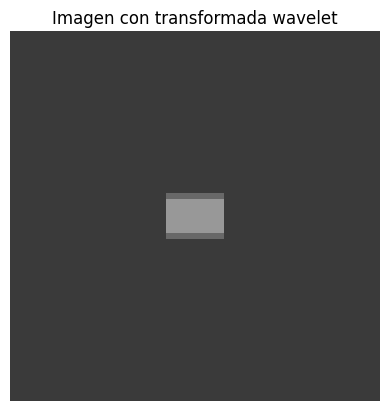

In [14]:
#Graficar ejemplo de imagen transformada
rutatransformada = "imageneswav/box_01_freq_reflect_09a2f2c2-ad7f-11ee-bb2a-047c16a08772_0-0_80-90.png"
imagentransformada = cv2.imread(rutatransformada)
plt.imshow(imagentransformada, cmap="gray")
plt.title("Imagen con transformada wavelet")
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

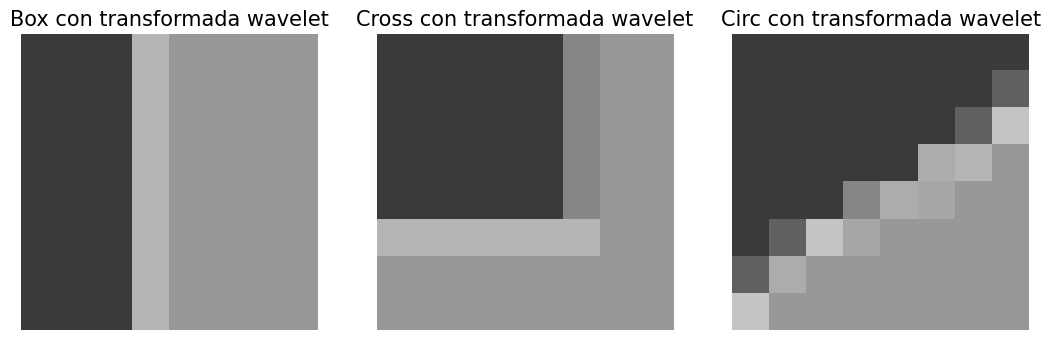

In [17]:
#Graficar plantillas con transformacion Wavelet
rutatemplateboxwav = "templateswav/box_templae.png"
templateBoxwav = cv2.imread(rutatemplateboxwav)
rutatemplatecrosswav = "templateswav/cross_templae.png"
templateCrosswav = cv2.imread(rutatemplatecrosswav)
rutatemplatecircwav = "templateswav/circ_templae.png"
templateCircwav = cv2.imread(rutatemplatecircwav)
plt.figure(figsize=(13, 5))
plt.subplot(131)
plt.imshow(templateBoxwav, cmap="gray")
plt.title("Box con transformada wavelet", fontsize = 15)
plt.axis("off")
plt.subplot(132)
plt.imshow(templateCrosswav, cmap="gray")
plt.title("Cross con transformada wavelet", fontsize = 15)
plt.axis("off")
plt.subplot(133)
plt.imshow(templateCircwav, cmap="gray")
plt.title("Circ con transformada wavelet", fontsize = 15)
plt.axis("off")

## 3. Operaciones
Para extraer las caracteristicas, debes realizar las operaciones de segmentación, normalización o convolución como creas necesarias.
El resultado de tus operaciones vas a usarlo para el proceso de matching.


In [18]:
def convolucion(imagen, kernel):
  """
  Realiza una convolución con un kernel dado.

  Parámetros:
  imagen: Imagen a convolucionar
  kernel: Kernel
  """
  imagenConv = cv2.filter2D(imagen, -1, kernel) #Aplicar convolución 2D con kernel dado
  return imagenConv

In [19]:
def segmentar(imagen):
  """
  Segmentar imagen a binaria.

  Parámetros:
  imagen: Imagen a segmentar
  """
  _, imagenBin = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU) #Aplicar el umbral de Otsu para segmentar la imagen
  return imagenBin

In [20]:
def normalizacion(imagen):
  """
  Normalizar imagen.

  Parámetros:
  imagen: Imagen a normalizar
  """
  imagen = imagen.astype("float32") #Convertir imagen a tipo float32
  minVal = np.min(imagen) #Obtener valor mínimo de la imagen
  maxVal = np.max(imagen) #Obtener valor máximo de la imagen
  imagen = (imagen-minVal) / (maxVal - minVal) #Normalización de la imagen
  imagen = (imagen * 255).astype("uint8") #Escalar pixeles a rango [0, 255]
  return imagen

In [21]:
def operacionesImagen(carpetaOrigen, carpetaDestino, nombreImagen):
  """
  Se realizan las operaciones de convolución, segmentación y normalización a una imagen y se guardan en una carpeta.

  Parámetros:
  carpetaOrigen: Carpeta donde se encuentra la imagen a realizar las operaciones
  carpetaDestino: Carpeta donde se guarda la imagen a realizar las operaciones
  nombreImagen: Nombre del archivo de la imagen a realizar las operaciones
  """
  rutaOrigen = os.path.join(carpetaOrigen, nombreImagen) #Definir la ruta de cada imagen en la carpeta de origen
  rutaDestino = os.path.join(carpetaDestino, nombreImagen) #Definir la ruta de cada imagen en la carpeta de destino

  imagen = cv2.imread(rutaOrigen) #Leer imágenes
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Convertir imagen a escala de grises
  kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) #kernel para la convolución
  imagen = convolucion(imagen, kernel) #Realizar convolución entre imagen y kernel
  imagen = segmentar(imagen) #Segmentar imagen convolucionada
  imagen = normalizacion(imagen) #Normalizar imagen segmentada
  cv2.imwrite(rutaDestino, imagen) #Guardar imagen con operaciones realizadas en carpeta de destino

def main3():
  carpetasorigen = ["imageneswav"] #Carpeta donde se encuentran las imágenes a realizar las operaciones
  carpetasorigenTemplate = ["templateswav"] #Carpeta donde se encuentran las plantillas a realizar las operaciones
  carpetasdestino = ["imagenespreprocesadas"] #Carpeta donde se guardarán las imágenes con operaciones
  carpetasdestinoTemplate = ["templatespreprocesadas"] #Carpeta donde se guardarán las plantillas con operaciones

  os.makedirs(carpetasdestino[0], exist_ok=True) #Crear carpeta de destino de imágenes con operaciones si no existe
  os.makedirs(carpetasdestinoTemplate[0], exist_ok=True) #Crear carpeta de destino de plantillas con operaciones si no existe

  tareasI = []
  for origen in carpetasorigen:
    for nombreImagen in os.listdir(origen):
      if nombreImagen.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
        tareasI.append((origen, carpetasdestino[0], nombreImagen)) #Agregar tareas a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    pool.starmap(operacionesImagen, tareasI)

  tareasTemplate = []
  for origenTemplate in carpetasorigenTemplate:
    for nombreTemplate in os.listdir(origenTemplate):
      if nombreTemplate.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
        tareasTemplate.append((origenTemplate, carpetasdestinoTemplate[0], nombreTemplate)) #Agregar tareas a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    pool.starmap(operacionesImagen, tareasTemplate)

if __name__ == '__main__':
  main3()

(-0.5, 63.5, 63.5, -0.5)

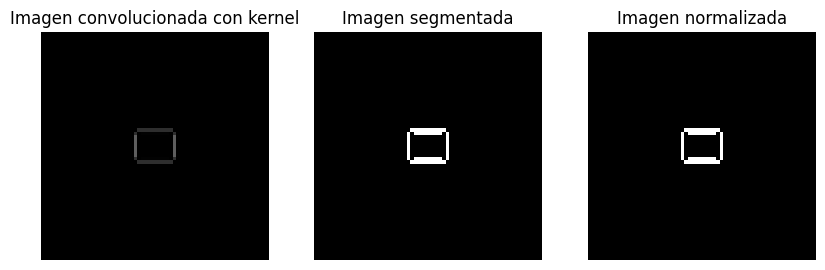

In [22]:
#Grafica de ejemplo de imagen con operaciones
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
imagenconv = convolucion(imagentransformada, kernel)
imagenseg = segmentar(imagenconv)
imagennorm = normalizacion(imagenseg)
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagenconv, cmap="gray")
plt.title("Imagen convolucionada con kernel")
plt.axis("off")
plt.subplot(132)
plt.imshow(imagenseg, cmap="gray")
plt.title("Imagen segmentada")
plt.axis("off")
plt.subplot(133)
plt.imshow(imagennorm, cmap="gray")
plt.title("Imagen normalizada")
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

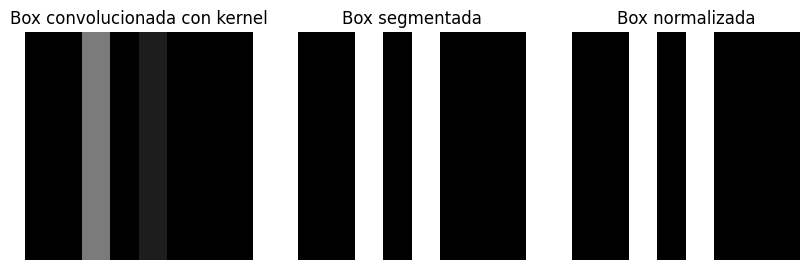

In [23]:
#Grafica de plantilla box con operaciones
imagenconvbox = convolucion(templateBoxwav, kernel)
imagensegbox = segmentar(imagenconvbox)
imagennormbox = normalizacion(imagensegbox)
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagenconvbox, cmap="gray")
plt.title("Box convolucionada con kernel")
plt.axis("off")
plt.subplot(132)
plt.imshow(imagensegbox, cmap="gray")
plt.title("Box segmentada")
plt.axis("off")
plt.subplot(133)
plt.imshow(imagennormbox, cmap="gray")
plt.title("Box normalizada")
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

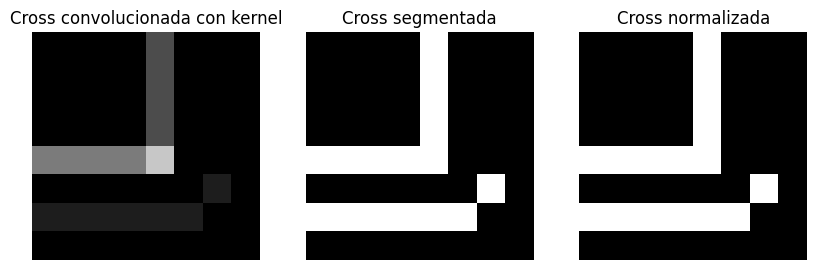

In [24]:
#Grafica de plantilla cross con operaciones
imagenconvcross = convolucion(templateCrosswav, kernel)
imagensegcross = segmentar(imagenconvcross)
imagennormcross = normalizacion(imagensegcross)
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagenconvcross, cmap="gray")
plt.title("Cross convolucionada con kernel")
plt.axis("off")
plt.subplot(132)
plt.imshow(imagensegcross, cmap="gray")
plt.title("Cross segmentada")
plt.axis("off")
plt.subplot(133)
plt.imshow(imagennormcross, cmap="gray")
plt.title("Cross normalizada")
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

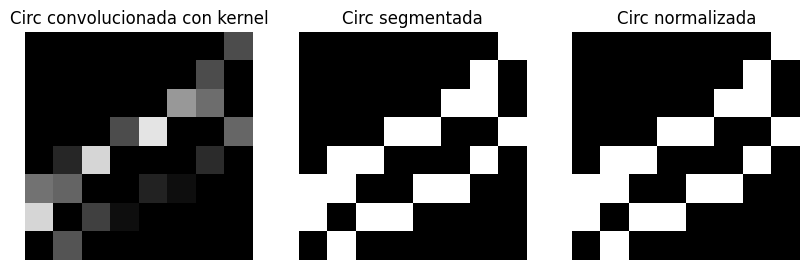

In [25]:
#Grafica de plantilla circ con operaciones
imagenconvcirc = convolucion(templateCircwav, kernel)
imagensegcirc = segmentar(imagenconvcirc)
imagennormcirc = normalizacion(imagensegcirc)
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(imagenconvcirc, cmap="gray")
plt.title("Circ convolucionada con kernel")
plt.axis("off")
plt.subplot(132)
plt.imshow(imagensegcirc, cmap="gray")
plt.title("Circ segmentada")
plt.axis("off")
plt.subplot(133)
plt.imshow(imagennormcirc, cmap="gray")
plt.title("Circ normalizada")
plt.axis("off")

## 4. Matching
El proceso de matching debe considerar que vas a usar las imagenes de referencia para calcular la correlación

Este proceso es similar a un windowing, donde la ventana es la imagen de referencia.
Como verás es un proceso iterativo, dispendioso, pero en el que puedes poner tu creatividad a funcionar para lograrlo de forma eficiente.

#### _TIP: realiza el proceso un batch pequeño de imagenes, o solo sobre un par de ellas, hasta que estés satisfecho con el resultado. Una vez esté listo, ESCALA el procedimiento para operar todas la imagenes lo más rápido posible.!_

In [73]:
def matching(imagen, template):
  """
  Realiza el matching entre una imagen y una plantilla.

  Parámetros:
  imagen: Imagen a realizar el matching
  template: Plantilla a realizar el matching
  """
  result = match_template(imagen, template) #Realizar matching entre imagen y plantilla

  return result.max()

In [74]:
def caracteristicas(imagen, wSize):
  """
  Extrae las caracteristicas de una imagen.

  Parámetros:
  imagen: Imagen a extraer las caracteristicas
  wSize: Tamaño de la ventana
  """
  caract = []

  #Recorrer la ventana por la imagen
  for i in range(0, imagen.shape[0] - wSize + 1, wSize):
    for j in range(0, imagen.shape[1] - wSize + 1, wSize):
      ventana = imagen[i:i+wSize, j:j+wSize] #Extraer ventana de la imagen
      caract.append(ventana) #Agregar ventana a las características
  return caract

# 5. Clasificación
De cada operación realizada de matching, obtendrás valores para inferir si la imagen bajo estudio corresponde con alguna de las 3 categorías: cross, box, circle.

Debes almacenar cada resultado obtenido para cada imagen, hallar el error de clasificación y generar un informe del error general al clasificar todas las imagenes.

Presenta aquí el resultado de clasificación numérico, así como  dos ejemplos verdaderos y dos ejemplos falsos de imagenes clasificadas.


In [79]:
def clasificaciones(imagen, templates, wSize):
  """
  Clasifica la imagen entre la categoría de las 3 plantillas.

  Parámetros:
  imagen: Imagen a clasificar
  templates: Plantillas según las categorias
  wSize: Tamaño de la ventana
  """
  caractImagen = caracteristicas(imagen, wSize) #Obtener características de la imagen
  mejorCorr = -1 #Iniciar mejores correlaciones con -1
  mejorClase = None #Iniciar mejores clases con None

  #Comparación de las características de la imagen con las plantillas
  for template, nombreTemplate in templates:
    for caracteristica in caractImagen:
      corr = matching(caracteristica, template) #Calcular correlación entre caracteristica y plantilla
      if corr > mejorCorr:
        mejorCorr = corr #Actualiza la mejor correlación
        mejorClase = nombreTemplate #Actualiza la mejor clase

  return mejorClase

In [76]:
def procesarImagen(carpetaOrigen, nombreImagen, templates, wSize):
  """
  Procesar imagen y clasificarla.

  Parámetros:
  carpetaOrigen: Carpeta donde se encuentra la imagen a procesar
  nombreImagen: Nombre del archivo de la imagen a procesar
  templates: Plantillas según las categorias
  wSize: Tamaño de la ventana
  """
  rutaImagen = os.path.join(carpetaOrigen, nombreImagen) #Definir la ruta de cada imagen en la carpeta de origen
  imagen = cv2.imread(rutaImagen) #Leer imágenes
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Convertir imágenes a escala de grises
  claseMio = clasificaciones(imagen, templates, wSize) #Clasificar la imagen
  claseReal = nombreImagen.split("_")[0] #Obtener la clase real de la imagen
  return (nombreImagen, claseReal, claseMio)

In [78]:
def main4():

  start = timer() #Empezar tiempo
  carpetaImagenes = "imagenespreprocesadas" #Carpeta donde se encuentran las imagenes con las operaciones
  carpetaTemplates = "templatespreprocesadas" #Carpeta donde se encuentran las plantillas con las operaciones

  wSize = 32 #Tamaño de la ventana

  imagenes = []
  for nombreImagen in os.listdir(carpetaImagenes):
    if nombreImagen.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
      imagenes.append(nombreImagen) #Agregar imagenes a la lista

  templates = []
  for nombreImagen in os.listdir(carpetaTemplates):
    if nombreImagen.endswith(('.jpg', '.jpeg', '.png')): #Filtrar archivos que terminen con .jpg, .jpeg, .png
      rutaTemplate = os.path.join(carpetaTemplates, nombreImagen) #Definir la ruta de cada plantilla en la carpeta de origen
      templateImagen = cv2.imread(rutaTemplate) #Leer plantillas
      templateImagen = cv2.cvtColor(templateImagen, cv2.COLOR_BGR2GRAY) #Convertir plantillas a escala de grises
      nombreTemplate = nombreImagen.split("_")[0] #Obtener la clase de la plantilla
      templates.append((templateImagen, nombreTemplate)) #Agregar templates a la lista

  clasificacionTareas = []
  for nombreImagen in imagenes:
    clasificacionTareas.append((carpetaImagenes, nombreImagen, templates, wSize)) #Agregar clasificacionTareas a la lista

  #Procesamiento en paralelo usando un pool de 4 procesos
  with Pool(processes=4) as pool:
    resultados = pool.starmap(procesarImagen, clasificacionTareas)

  correcto = []
  incorrecto = []

  #Comparar clase inferida con la clase real
  for resultado in resultados:
    if resultado[1] == resultado[2]: #Si la clase inferida es la misma que la real:
      correcto.append(resultado) #Agregar resultado a la lista de resultados correctos
    else: #Si la clase inferida es diferente de la real:
      incorrecto.append(resultado) #Agregar resultado a la lista de resultados incorrectos

  errores = (len(incorrecto) / len(resultados)) * 100 #Calcular porcentaje de errores
  print(f"Error de clasificación de: {errores: .2f}%") #Imprimir en pantalla el procentaje de errores

  print("Ejemplos correctos: ")
  #Imprimir en pantalla dos ejemplos correctos
  for i in range(min(2, len(correcto))):
    print(f"Clase real: {correcto[i][1]} - Clase inferida: {correcto[i][2]}")

  print( "Ejemplos incorrectos: ")
  #Imprimir en pantalla dos ejemplos incorrectos
  for i in range(min(2, len(incorrecto))):
    print(f"Clase real: {incorrecto[i][1]} - Clase inferida: {correcto[i][2]}")

  end = timer() #Terminar tiempo
  print(f"Tiempo de procesamiento: {(end - start)/60} minutos") #Imprimir en pantalla el tiempo de procesamiento

if __name__ == '__main__':
  main4()


Error de clasificación de:  38.14%
Ejemplos correctos: 
Clase real: circ - Clase inferida: circ
Clase real: circ - Clase inferida: circ
Ejemplos incorrectos: 
Clase real: box - Clase inferida: circ
Clase real: box - Clase inferida: circ
Tiempo de procesamiento: 2.0959767028666647 minutos
